In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
from data.load_data import load_data
import os

In [5]:
file_path="../data/raw/water_quality.csv"
df = load_data(file_path)

Data successfully loaded from ../data/raw/water_quality.csv


In [7]:
# Printing any 2 rows for data sanity check

df.sample(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
996,6.836225,166.742962,24293.172663,6.861235,332.881582,390.804955,16.006991,87.101925,3.666614,0
2288,NaN,175.833944,36819.986845,7.650455,322.021909,344.716053,16.918916,NaN,3.524414,0


<h2><b><span style="color:navy">💧 Step 2.2 | </span><span style="color:blue">Data Informations</span></b></h2>

In [8]:
# Display concise summary of DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
# Retrieve the dimensions of the DataFrame
df.shape

(3276, 10)

In [11]:
# Generate descriptive statistics for the DataFrame
df.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)


,min,50%,mean,max,std
ph,0.000000,7.036752,7.080795,14.000000,1.594320
Hardness,47.432000,196.967627,196.369496,323.124000,32.879761
Solids,320.942611,20927.833607,22014.092526,61227.196008,8768.570828
Chloramines,0.352000,7.130299,7.122277,13.127000,1.583085
Sulfate,129.000000,333.073546,333.775777,481.030642,41.416840
Conductivity,181.483754,421.884968,426.205111,753.342620,80.824064
Organic_carbon,2.200000,14.218338,14.284970,28.300000,3.308162
Trihalomethanes,0.738000,66.622485,66.396293,124.000000,16.175008
Turbidity,1.450000,3.955028,3.966786,6.739000,0.780382
Potability,0.000000,0.000000,0.390110,1.000000,0.487849


In [12]:
# Check for missing values in the DataFrame
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<h2><b><span style="color:navy">💧 Step 2.3 | </span><span style="color:blue">Columns Explanation</span></b></h2>

<div style="border:5px solid navy; border-radius:20px; padding: 15px; font-family:Arial">
<h3><b>1. pH value:</b></h3>
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

<h3><b>2. Hardness:</b></h3>
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

<h3><b>3. Solids (Total dissolved solids - TDS):</b></h3>
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

<h3><b>4. Chloramines:</b></h3>
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

<h3><b>5. Sulfate:</b></h3>
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

<h3><b>6. Conductivity:</b></h3>
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

<h3><b>7. Organic_carbon:</b></h3>
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

<h3><b>8. Trihalomethanes:</b></h3>
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

<h3><b>9. Turbidity:</b></h3>
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

<h3><b>10. Potability:</b></h3>
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.
</div>

<h2><b><span style="color:navy">💧 Step 2.4 | </span><span style="color:blue">Checking of class imbalance</span></b></h2>

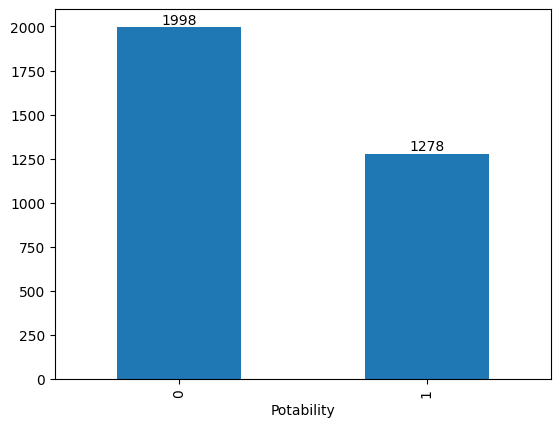

In [13]:
# Create a bar plot of the 'Potability' column
ax = df['Potability'].value_counts().plot(kind='bar')

# Add labels to each bar in the plot
for i in ax.containers:
    ax.bar_label(i)


### Class Imbalance seems to be observed in the data for which measures will be taken while model training.

<h1><b><p style="background-image: url(https://i.postimg.cc/ZK8sS4cQ/Free-Wallpaper-Cartoon-Blue-Background-Images-Cartoon-Blue-Watercolor-Background-Material-Ocean.png);font-family:tahoma;font-size:120%;color:navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step3 | Visualizations</p></b></h1>

<h2><b><span style="color:navy">💧 Step 3.1 | </span><span style="color:blue">Correlation</span></b></h2>

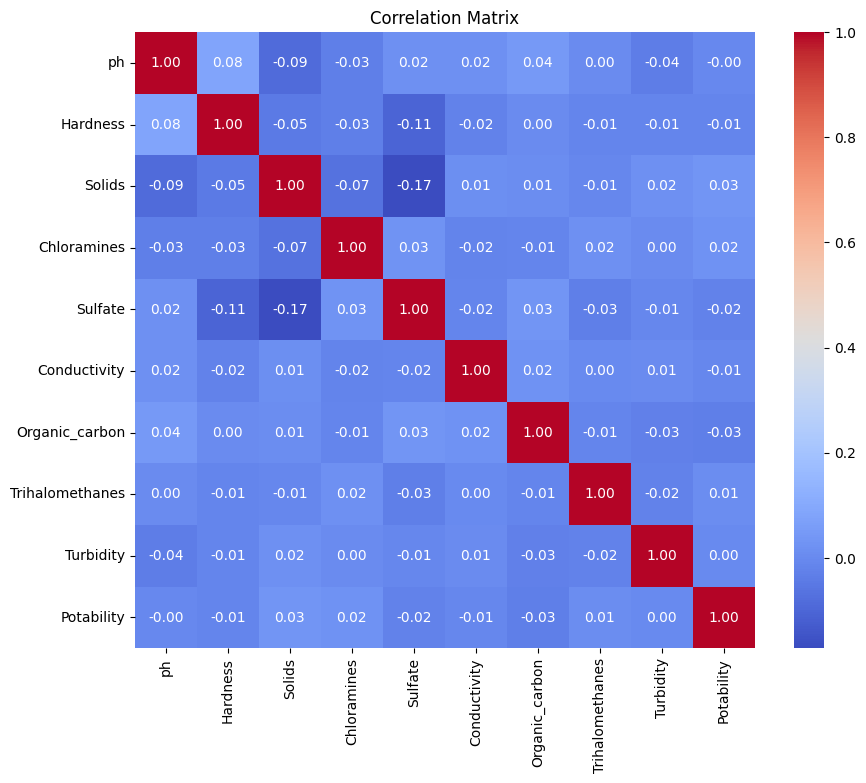

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<div style="font-size:130%; font-weight:500; background-color:#edfeff">➡️ The correlation figure suggests that none of the independent variable is correlated.</div>


<h2><b><span style="color:navy">💧 Step 3.2 | </span><span style="color:blue">Plots</span></b></h2>

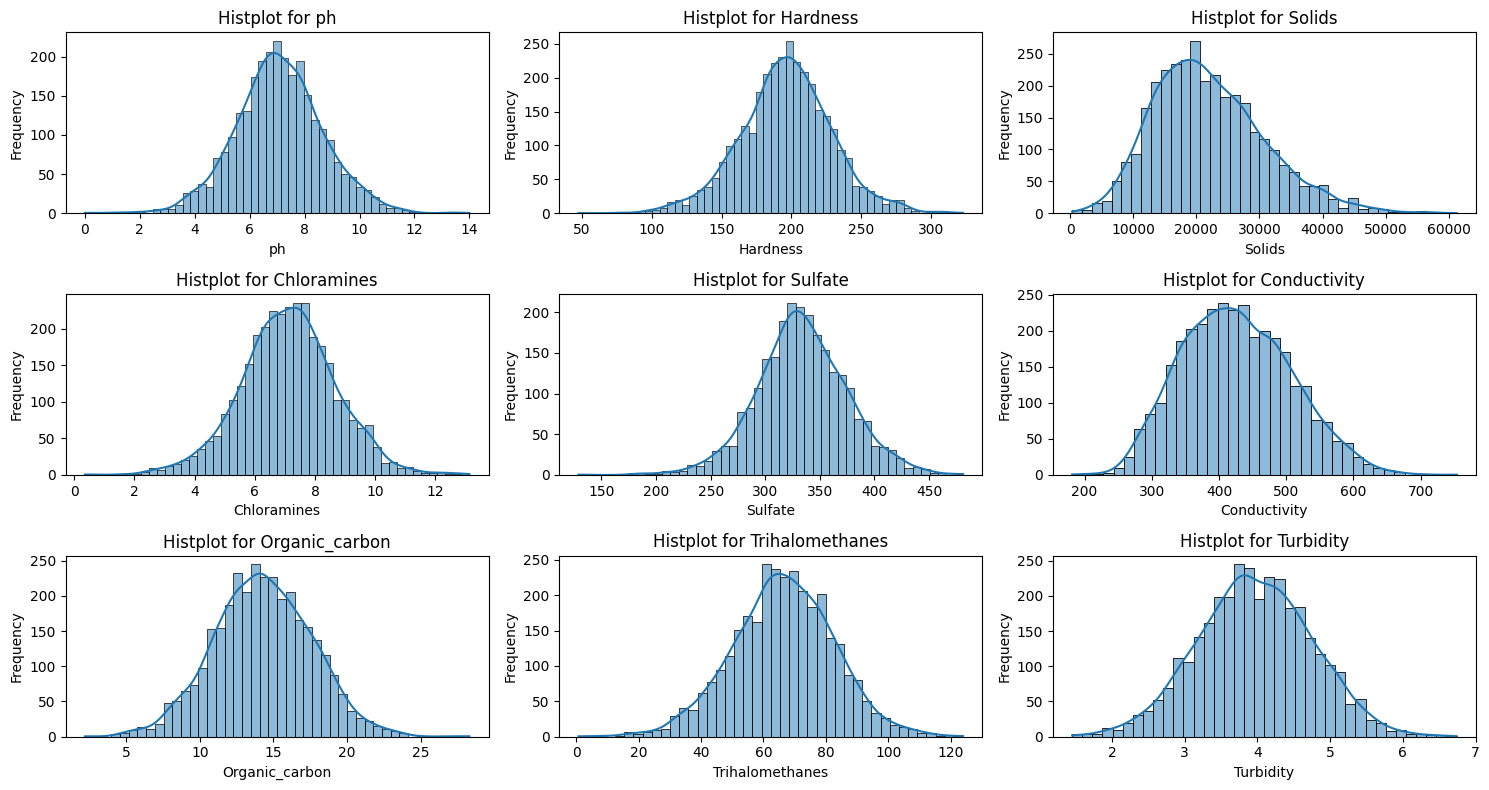

In [24]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 8))

# Iterate over the columns and create individual histograms with KDE
for i, column in enumerate(df.columns[:9]):  # Adjust the number of columns as needed
    row, col = divmod(i, 3)  # Calculate the row and column indices
    sns.histplot(df[column], kde=True, ax=axes[row, col])  # Specify the axis to plot on
    axes[row, col].set_title(f'Histplot for {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()




<div style="font-size:130%; font-weight:500; background-color:#edfeff">➡️ The Histograms suggest that the parameters are almost normally distributed.</div>


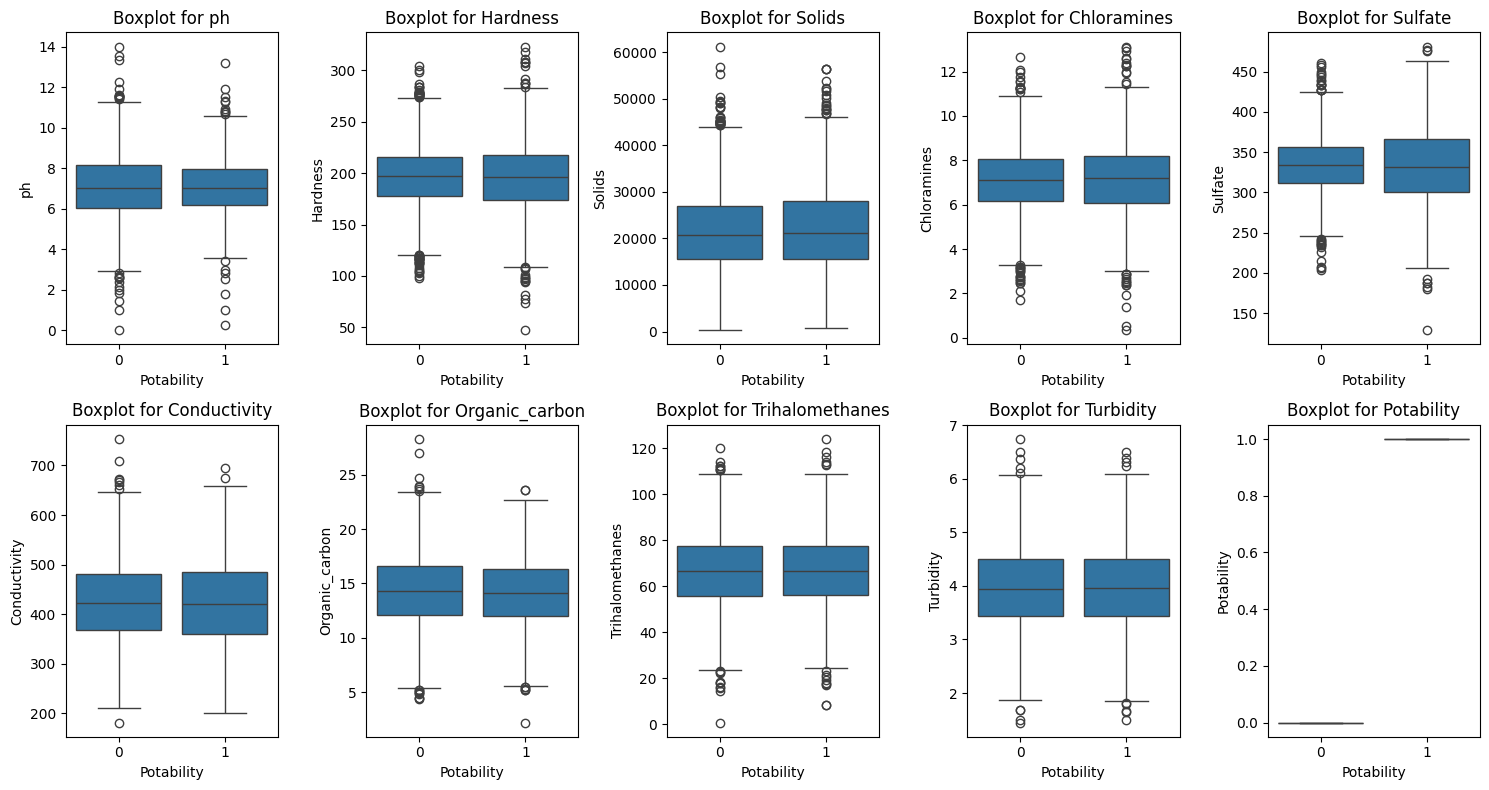

In [25]:
#Boxplots
fig, axes = plt.subplots(2, 5, figsize=(15, 8))  # Create a 2x5 grid of subplots

# Iterate over the columns and create individual boxplots
for i, column in enumerate(df.columns[:10]):  # Adjust the number of columns as needed
    row, col = divmod(i, 5)  # Calculate the row and column indices
    sns.boxplot(y=df[column], ax=axes[row, col],x=df["Potability"])
    axes[row, col].set_title(f'Boxplot for {column}')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


<div style="font-size:130%; font-weight:500; background-color:#edfeff">➡️ The box plots are suggesting that their is no major outlier and the median for both the values of Potability are almost equal.</div>